# Testing visualization of decision tree

This notebook is used to verify consistency of implemented javascript decision tree classes with those of sklearn.

In [1]:
from sklearn.externals.six import StringIO  
from IPython.display import Image, display
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# visualization functionality
def render_tree(model):
    dot_data = StringIO()
    export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))

## Classification decision trees

[0 0 0 1]


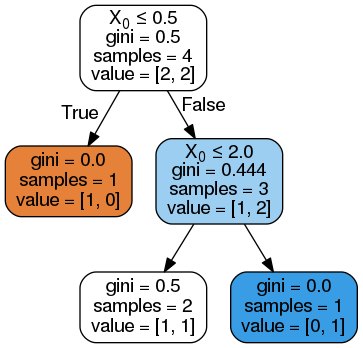

In [2]:
# overlapping labels for features
X = [[0],[1],[1],[3]]
y = [ 0,  0,  1,  1 ]

model = DecisionTreeClassifier().fit(X, y)
print(model.predict(X))

render_tree(model)

[0 1 1 1]


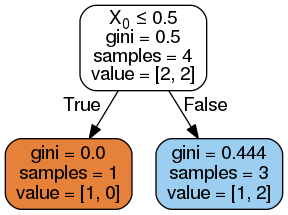

In [3]:
# overlapping labels for features
X = [[0],[1],[1],[3]]
y = [ 0,  0,  1,  1 ]

model = DecisionTreeClassifier(max_depth=1).fit(X, y)
print(model.predict(X))

render_tree(model)

[0 1 1 1]


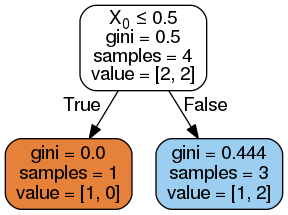

In [4]:
# overlapping labels for features
X = [[0],[1],[1],[3]]
y = [ 0,  0,  1,  1 ]

model = DecisionTreeClassifier(min_samples_split=4).fit(X, y)
print(model.predict(X))

render_tree(model)

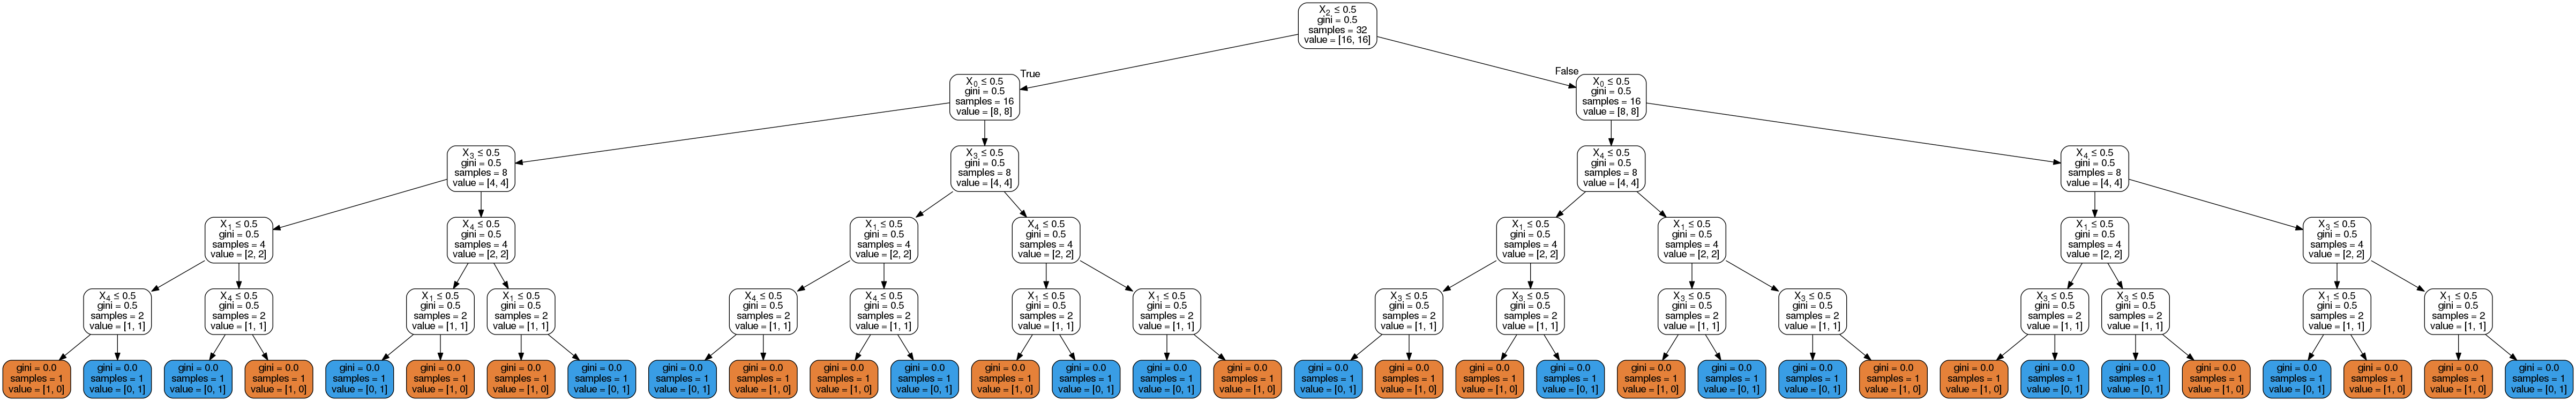

array([[1, 1, 0, 1, 1],
       [0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0],
       [1, 0, 1, 0, 1],
       [1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 1],
       [0, 1, 0, 1, 1],
       [0, 1, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [1, 1, 0, 1, 0],
       [1, 1, 0, 0, 1],
       [1, 1, 1, 1, 0],
       [0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 1, 0, 0],
       [1, 0, 1, 1, 0],
       [0, 0, 1, 1, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 1],
       [1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1],
       [1, 0, 1, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 1, 0, 1, 0],
       [1, 0, 0, 1, 0]])
array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0])


In [5]:
# this was uncovered via benchmarking to break the js tree
import pmlb
from pprint import pprint
X, y = pmlb.fetch_data('parity5', True)

model = DecisionTreeClassifier(max_depth=5).fit(X, y)
render_tree(model)
pprint(X)
pprint(y)

In [6]:
import numpy as np

# a bit more elaborate dataset
np.random.seed(1)
X = np.random.randn(10, 3)
X = np.round(X, 2)
w = np.random.randn(3)
y = np.dot(X, w)

y = np.round(y)
y[y > 1] = 1
y[y < -1] = -1
y = np.round(y + 1e-6)
from pprint import pprint
pprint(X)
pprint(y)

array([[ 1.62, -0.61, -0.53],
       [-1.07,  0.87, -2.3 ],
       [ 1.74, -0.76,  0.32],
       [-0.25,  1.46, -2.06],
       [-0.32, -0.38,  1.13],
       [-1.1 , -0.17, -0.88],
       [ 0.04,  0.58, -1.1 ],
       [ 1.14,  0.9 ,  0.5 ],
       [ 0.9 , -0.68, -0.12],
       [-0.94, -0.27,  0.53]])
array([-1.,  1., -1.,  1.,  0.,  1.,  0., -1.,  0.,  0.])


array([-1.,  1., -1.,  1.,  0.,  1.,  1., -1.,  0.,  0.])


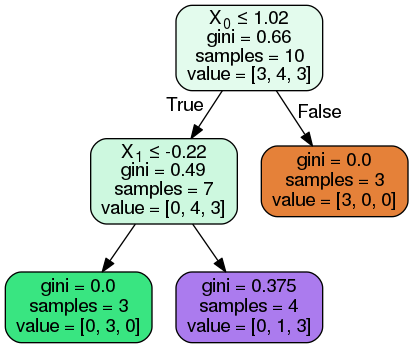

In [7]:
model = DecisionTreeClassifier(min_impurity_decrease=0.16).fit(X, y)
pprint(model.predict(X))
render_tree(model)

## Regression decision trees

Note that dataset from above is reused

array([-1.        ,  0.42857143, -1.        ,  0.42857143,  0.42857143,
        0.42857143,  0.42857143, -1.        ,  0.42857143,  0.42857143])


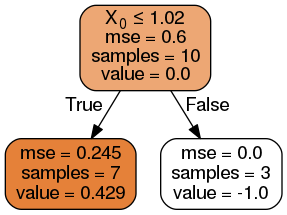

In [8]:
model = DecisionTreeRegressor(min_samples_split=8).fit(X, y)
pprint(model.predict(X))
render_tree(model)